## Gradient Descent (Gradiente Descendente)

gradient descent is a solution to optimization problems 

In [1]:
# some imports from linear algebra

from typing import List

Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    
    assert len(v) == len(w), "vectors must to be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [4]:
from typing import Callable

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squares elements in v"""
    
    return dot(v, v)

def difference_quotient(f: Callable[[float], float],
                        x: float, h: float) -> float:
    
    return (f(x+h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def devirative(x: float) -> float:
    return 2 * x

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector, h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

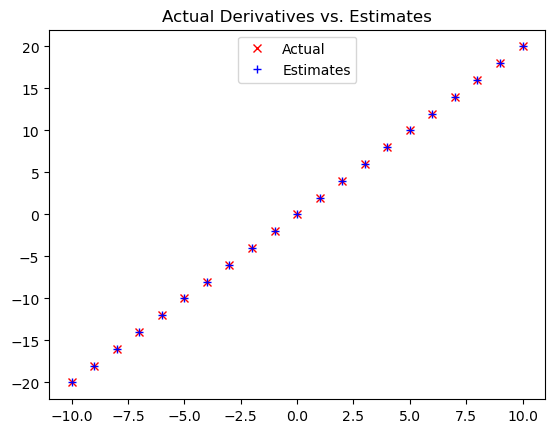

In [6]:
import matplotlib.pyplot as plt

xs = range(-10, 11)
actuals = [devirative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.0001) for x in xs]

plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimates')
plt.title("Actual Derivatives vs. Estimates")
plt.legend(loc=9)
plt.show()

In [7]:
# using gradiant

import random

def squared_distance(v: Vector, w: Vector) -> float:
    """Compute (v_1 - w_1)**2 + ... + (v_n - w_n)**2"""
    
    return sum_of_square(subtrac(v))

def distance(v: Vector, w: Vector) -> float:
    """Compute v and w distance"""
    
    return math.sqrt(squared_distance(v, w))

def add(v: Vector, w: Vector) -> Vector:
    """Add the corresponding elements"""
    assert len(v) == len(w), "vector must be the same length"
    
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies each element by c"""
    
    return [c * v_i for v_i in v]

In [9]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves 'step_size' in the 'gradient' direction from 'v'"""
    
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [12]:
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)   # v must be close to 0 

0 [-3.429558232524137, 6.8331827324973196, 1.8907663017569905]
1 [-3.3609670678736543, 6.696519077847373, 1.8529509757218507]
2 [-3.293747726516181, 6.562588696290426, 1.8158919562074138]
3 [-3.2278727719858575, 6.4313369223646175, 1.7795741170832655]
4 [-3.1633153165461403, 6.302710183917325, 1.7439826347416003]
5 [-3.1000490102152174, 6.176655980238979, 1.7091029820467682]
6 [-3.038048030010913, 6.0531228606342, 1.6749209224058328]
7 [-2.977287069410695, 5.932060403421516, 1.6414225039577162]
8 [-2.917741328022481, 5.813419195353085, 1.608594053878562]
9 [-2.8593865014620317, 5.697150811446024, 1.5764221728009906]
10 [-2.802198771432791, 5.5832077952171035, 1.5448937293449707]
11 [-2.7461547960041353, 5.471543639312761, 1.5139958547580712]
12 [-2.6912317000840527, 5.362112766526506, 1.4837159376629097]
13 [-2.6374070660823716, 5.254870511195976, 1.4540416189096514]
14 [-2.584658924760724, 5.149773100972056, 1.4249607865314584]
15 [-2.5329657462655097, 5.046777638952615, 1.39646157080

In [25]:
# using gradient descent to fit models

def sum_vector(vectors: List[Vector]) -> Vector:
    """Sum all corresponding elements"""
    
    assert vectors, "no vectors provided!"
    
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "differents sizes!"
    
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the average of the elements"""
    
    n = len(vectors)
    return scalar_multiply(1/n, sum_vector(vectors))

inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [18]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    
    return grad

In [26]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) 
                        for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)    
    print(epoch, theta)

0 [33.162909271136215, -0.4407614634069163]
1 [11.21489875468874, -0.4167170312089663]
2 [25.854245813591405, -0.4146686983918596]
3 [16.08980337363614, -0.39798511518148455]
4 [22.602703164669514, -0.39109934157748544]
5 [18.258605889823855, -0.37771443972966096]
6 [21.156132157047757, -0.3687004049603778]
7 [19.223491150844186, -0.3568068719934093]
8 [20.512574595514934, -0.34686976709857836]
9 [19.65276587502444, -0.33566345296886624]
10 [20.22626949790573, -0.32533936018790405]
11 [19.84375290553669, -0.31446241196962255]
12 [20.098902349595058, -0.3039897342401466]
13 [19.928728143085856, -0.2932828524220712]
14 [20.04224504570931, -0.2827675585741412]
15 [19.966539786953316, -0.2721597784112836]
16 [20.01704580232373, -0.2616489190675077]
17 [19.983368800931004, -0.25110857542704895]
18 [20.005841901203592, -0.2406229894752639]
19 [19.99086282890773, -0.2301359015951098]
20 [20.000864357216948, -0.21968476696301187]
21 [19.994203788969333, -0.20924453307186888]
22 [19.99865682822

2298 [19.999967175500565, 4.945347188727853]
2299 [19.999967241129852, 4.945456461525898]
2300 [19.999967306627916, 4.945565515843976]
2301 [19.999967371995023, 4.945674352118916]
2302 [19.99996743723144, 4.945782970786673]
2303 [19.999967502337416, 4.945891372282331]
2304 [19.999967567313227, 4.945999557040103]
2305 [19.999967632159116, 4.946107525493336]
2306 [19.999967696875363, 4.946215278074509]
2307 [19.99996776146221, 4.946322815215235]
2308 [19.99996782591992, 4.946430137346267]
2309 [19.999967890248758, 4.9465372448974945]
2310 [19.999967954448977, 4.946644138297948]
2311 [19.999968018520832, 4.9467508179758015]
2312 [19.99996808246458, 4.946857284358371]
2313 [19.999968146280484, 4.946963537872119]
2314 [19.999968209968788, 4.947069578942655]
2315 [19.99996827352976, 4.947175407994738]
2316 [19.999968336963644, 4.947281025452279]
2317 [19.999968400270703, 4.947386431738338]
2318 [19.99996846345118, 4.947491627275133]
2319 [19.999968526505338, 4.947596612484033]
2320 [19.99996

3696 [19.999997999860838, 4.996669767095564]
3697 [19.99999800385992, 4.996676425561233]
3698 [19.999998007850994, 4.996683070713971]
3699 [19.9999980118341, 4.996689702580394]
3700 [19.999998015809236, 4.996696321187067]
3701 [19.999998019776427, 4.996702926560502]
3702 [19.999998023735685, 4.996709518727157]
3703 [19.999998027687024, 4.996716097713438]
3704 [19.99999803163047, 4.9967226635456985]
3705 [19.999998035566023, 4.9967292162502375]
3706 [19.999998039493715, 4.996735755853303]
3707 [19.999998043413544, 4.99674228238109]
3708 [19.999998047325548, 4.996748795859742]
3709 [19.99999805122972, 4.996755296315348]
3710 [19.999998055126092, 4.996761783773946]
3711 [19.999998059014672, 4.9967682582615245]
3712 [19.999998062895475, 4.996774719804016]
3713 [19.999998066768523, 4.996781168427304]
3714 [19.999998070633822, 4.996787604157218]
3715 [19.999998074491398, 4.996794027019537]
3716 [19.999998078341257, 4.996800437039989]
3717 [19.99999808218342, 4.996806834244251]
3718 [19.99999

In [27]:
slope, intercepted = theta

assert 19.9 < slope < 20.1
assert 4.9 < intercepted < 5.1

In [28]:
# minibatch

from typing import TypeVar, List, Iterator

T = TypeVar('T') # this allows us to use "generic functions"

In [34]:
def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [35]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.74432079600372, 0.51482264596163]
1 [19.741360018658877, 1.1230778451097247]
2 [19.816127042276893, 1.2990898646570197]
3 [20.126526926992096, 1.3734573451447374]
4 [19.434902699455836, 1.4148589894018047]
5 [19.999001827317926, 1.4375996460404707]
6 [20.01777785641053, 1.4588695996877488]
7 [20.23659462395457, 1.4871026244309036]
8 [19.870935912026365, 1.4806042682994334]
9 [20.15462729339604, 1.4876178963710738]
10 [20.02560929591074, 1.5076477779376276]
11 [20.006109867856022, 1.66698310045228]
12 [20.050669400437, 1.6797853267506166]
13 [20.017030249506405, 1.6996698764032836]
14 [19.8043496231262, 1.7090108172309117]
15 [20.199037651805963, 1.7232761058729997]
16 [20.50285346197321, 1.8112582753453894]
17 [20.14240706696259, 2.128314578324261]
18 [20.047338328787287, 2.127963165631267]
19 [19.908147395324168, 2.160301553977466]
20 [20.001054464904826, 2.1787862880104725]
21 [20.042575956836014, 2.18990401390746]
22 [19.89504044779851, 2.2338761686150446]
23 [19.5856741348873